## 앙상블 기법
- 여러개의 분류기를 생성하고 그 예측을 결합하여 정확한 최종예측을 기대하는 법
- 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 높은 예측 값을 얻는 것

## voting과 bagging
- voting은 다양한 분류기에 같은 데이터로 예측을 진행하여 가장 높은 결과를 채택
- bagging은 같은 데이터셋에서 중복을 포함한 데이터를 샘플링하고 같은 분류기로 예측을 진행
- 각각의 분류기에 데이터를 각각 샘플링해서 추출하는 방식을 **부트스트래핑** 이라고 함

### 랜덤 포레스트

- 배깅의 대표적인 방법
- 앙상블 방법 중에서 비교적 속도가 빠르며 다양한 영역에서 높은 성능을 보여주고 있음
    - 부트스트래핑은 여러개의 작은 데이터 셋을 중첩을 허용해서 만드는 것
- 랜덤 포레스트는 결정나무를 기본으로 함
    - 부트스트래핑으로 샘플링된 데이터마다 결정나무가 예측한 결과를 소프트보팅으로 최종 예측 결론을 얻음


## 하드 보팅과 소프트 보팅
- 하드 보팅 :  다수의 분류기가 예측한 결과값을 최종 예측값으로 결정(다수결의 원칙)
- 소프트 보팅 : 분류기들의 레이블 값 결정확률의 평균을 구한 뒤 확률이 가장 높은 레이블 값을
                최종 예측값으로 결정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'
feature_name_df = pd.read_csv(url,header=None, names=['feature_index', 'feature_names'])
feature_name_df.head()

,feature_index,feature_names
0,1 tBodyAcc-mean()-X,NaN
1,2 tBodyAcc-mean()-Y,NaN
2,3 tBodyAcc-mean()-Z,NaN
3,4 tBodyAcc-std()-X,NaN
4,5 tBodyAcc-std()-Y,NaN


In [11]:
feature_name_df['feature_names'] = feature_name_df['feature_index']
feature_name_df['feature_index'] = feature_name_df.index

In [12]:
feature_name_df

,feature_index,feature_names
0,0,1 tBodyAcc-mean()-X
1,1,2 tBodyAcc-mean()-Y
2,2,3 tBodyAcc-mean()-Z
3,3,4 tBodyAcc-std()-X
4,4,5 tBodyAcc-std()-Y
...,...,...
556,556,557 angle(tBodyGyroMean
557,557,558 angle(tBodyGyroJerkMean
558,558,559 angle(X
559,559,560 angle(Y


### 일단 훈련 데이터 만 가져오기

In [38]:
tr_dt = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
te_dt = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

tr_df = pd.read_csv(tr_dt, sep='\s+', header=None)
te_df = pd.read_csv(te_dt, sep='\s+', header=None)

In [40]:
tr_df.columns = feature_name_df['feature_names']
te_df.columns = feature_name_df['feature_names']
tr_df.head()

feature_names,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),555 angle(tBodyAccMean,556 angle(tBodyAccJerkMean),557 angle(tBodyGyroMean,558 angle(tBodyGyroJerkMean,559 angle(X,560 angle(Y,561 angle(Z
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### 데이터 레이블 가져오기

In [42]:
tr_lb = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
te_lb = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

tr_lb = pd.read_csv(tr_lb, sep='\s+', header=None, names=['action'])
te_lb = pd.read_csv(te_lb, sep='\s+', header=None, names=['action'])

In [43]:
tr_df.shape, te_df.shape, tr_lb.shape, te_lb.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### 각 액션별 데이터의 수

In [44]:
tr_lb['action'].value_counts()

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64

### 결정나무부터

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score

dt_clf = DecisionTreeClassifier(max_depth=4, random_state=13)
dt_clf.fit(tr_df, tr_lb)
pred = dt_clf.predict(te_df)

print('tr ac : ', accuracy_score(te_lb, pred))

tr ac :  0.8096369189005769


### gridsearchcv

In [48]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',
                       cv=5, return_train_score=True)
grid_cv.fit(tr_df, tr_lb)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [49]:
grid_cv.best_score_

0.8543335321892183

In [50]:
grid_cv.best_params_

{'max_depth': 8}

### 표로 정리
- train과 test의 score의 차이가 나므로 과적합을 의심해야 한다

In [51]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


### 실제 test 데이터에서의 결과

In [52]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=13)
    dt_clf.fit(tr_df, tr_lb)
    pred = dt_clf.predict(te_df)
    accuracy = accuracy_score(te_lb, pred)
    print('depth = ', depth, ', acc : ', accuracy)

depth =  6 , acc :  0.8554462164913471
depth =  8 , acc :  0.8734306073973532
depth =  10 , acc :  0.8615541228367831
depth =  12 , acc :  0.8595181540549711
depth =  16 , acc :  0.8669833729216152
depth =  20 , acc :  0.8652867322701052
depth =  24 , acc :  0.8652867322701052


In [53]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(te_df)

accuracy_score(te_lb, pred1)

0.8734306073973532

### 랜덤 포레스트 적용

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200], ##트리를 몇 그루 쓸 건가
    'min_samples_leaf' :[8, 12],
    'min_samples_split' : [8, 12] 
}

rt_clf = RandomForestClassifier(random_state=13, n_jobs=4)
grid_cv = GridSearchCV(rt_clf, param_grid= params, cv=2, n_jobs=4)
grid_cv.fit(tr_df, tr_lb)

/home/soomin/venv/ml_venv/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=4, random_state=13),
             n_jobs=4,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [57]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [58]:
target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators','param_max_depth']

cv_result_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


In [59]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [60]:
grid_cv.best_score_

0.9151251360174102

### test 데이터에 적용

In [61]:
rt_clf_best = grid_cv.best_estimator_
rt_clf_best.fit(tr_df, tr_lb)

pred1 = rt_clf_best.predict(te_df)
accuracy_score(te_lb, pred1)

/home/soomin/venv/ml_venv/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9205972175093315

### 중요 특성 확인
- 개별 특성의 중요도가 별로 높지 않다

In [62]:
best_cols_values = rt_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=tr_df.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

feature_names
559 angle(X                         0.034638
51 tGravityAcc-max()-Y              0.032518
57 tGravityAcc-energy()-X           0.031309
41 tGravityAcc-mean()-X             0.029513
53 tGravityAcc-min()-X              0.027775
50 tGravityAcc-max()-X              0.027662
560 angle(Y                         0.026553
42 tGravityAcc-mean()-Y             0.026052
54 tGravityAcc-min()-Y              0.023037
58 tGravityAcc-energy()-Y           0.018678
43 tGravityAcc-mean()-Z             0.015688
561 angle(Z                         0.012837
272 fBodyAcc-mad()-X                0.012558
10 tBodyAcc-max()-X                 0.011970
394 fBodyAccJerk-bandsEnergy()-1    0.011803
103 tBodyAccJerk-entropy()-X        0.011647
215 tGravityAccMag-std()            0.011451
97 tBodyAccJerk-energy()-X          0.011333
74 tGravityAcc-arCoeff()-Z          0.011257
354 fBodyAccJerk-max()-X            0.011040
dtype: float64

### 시각화

/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/soomin/venv/ml_venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


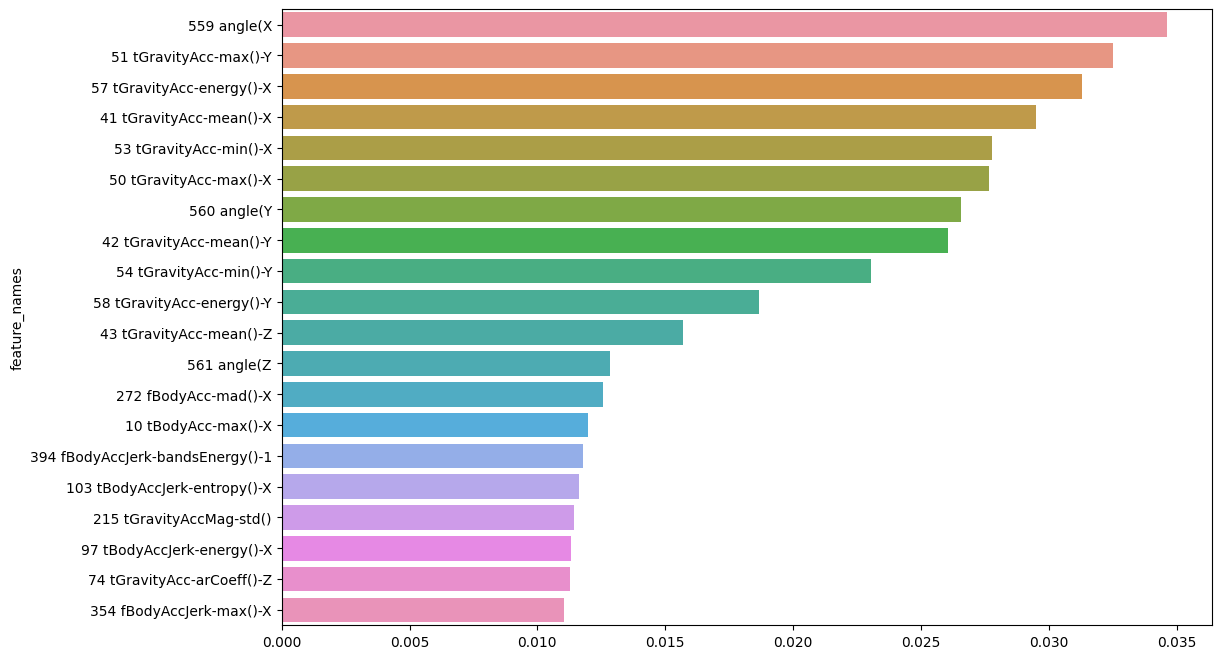

In [63]:
import seaborn as sns

plt.figure(figsize=(12, 8 ))
sns.barplot(x = top20_cols, y=top20_cols.index)
plt.show()

### 20개 특성만 가지고 다시 성능 확인
- 속도는 매우 빠르지만 정확도가 떨어짐

In [64]:
tr_df_re = tr_df[top20_cols.index]
te_df_re = te_df[top20_cols.index]

In [65]:
tr_df_re

feature_names,559 angle(X,51 tGravityAcc-max()-Y,57 tGravityAcc-energy()-X,41 tGravityAcc-mean()-X,53 tGravityAcc-min()-X,50 tGravityAcc-max()-X,560 angle(Y,42 tGravityAcc-mean()-Y,54 tGravityAcc-min()-Y,58 tGravityAcc-energy()-Y,43 tGravityAcc-mean()-Z,561 angle(Z,272 fBodyAcc-mad()-X,10 tBodyAcc-max()-X,394 fBodyAccJerk-bandsEnergy()-1,103 tBodyAccJerk-entropy()-X,215 tGravityAccMag-std(),97 tBodyAccJerk-energy()-X,74 tGravityAcc-arCoeff()-Z,354 fBodyAccJerk-max()-X
0,-0.841247,-0.161265,0.899469,0.963396,0.977436,0.892055,0.179941,-0.140840,-0.123213,-0.970905,0.115375,-0.058627,-0.996889,-0.934724,-0.999981,-0.819949,-0.950551,-0.999935,-0.995112,-0.996737
1,-0.844788,-0.161343,0.907829,0.966561,0.984520,0.892060,0.180289,-0.141551,-0.114893,-0.970583,0.109379,-0.054317,-0.997890,-0.943068,-0.999974,-0.875096,-0.976057,-0.999960,-0.833882,-0.997425
2,-0.848933,-0.163711,0.908668,0.966878,0.986770,0.892401,0.180637,-0.142010,-0.114893,-0.970368,0.101884,-0.049118,-0.994097,-0.938692,-0.999909,-0.753629,-0.988020,-0.999894,-0.705039,-0.995163
3,-0.848649,-0.163711,0.910621,0.967615,0.986821,0.893817,0.181935,-0.143976,-0.121336,-0.969400,0.099850,-0.047663,-0.994547,-0.938692,-0.999927,-0.820804,-0.986421,-0.999924,-0.385410,-0.993402
4,-0.847865,-0.166786,0.912235,0.968224,0.987434,0.893817,0.185151,-0.148750,-0.121834,-0.967051,0.094486,-0.043892,-0.997725,-0.942469,-0.999975,-0.850744,-0.991275,-0.999969,-0.237474,-0.997009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.791883,-0.214233,0.794766,0.923148,0.920554,0.867718,0.238604,-0.222004,-0.234998,-0.918375,-0.039492,0.049819,-0.050748,0.210795,-0.724214,0.470793,-0.093688,-0.751511,-0.787143,-0.581040
7348,-0.771840,-0.231477,0.782407,0.918343,0.920554,0.866116,0.252676,-0.242054,-0.234998,-0.902880,-0.039863,0.050053,-0.177661,0.117440,-0.767363,0.534431,-0.148539,-0.785945,-0.710545,-0.534744
7349,-0.779133,-0.249134,0.786085,0.919810,0.933008,0.854641,0.249145,-0.236950,-0.216004,-0.907561,-0.026805,0.040811,-0.249486,0.043999,-0.757269,0.657112,-0.158701,-0.783179,-0.821631,-0.482657
7350,-0.785181,-0.244267,0.792538,0.922323,0.933008,0.855988,0.246432,-0.233230,-0.210542,-0.910648,-0.004984,0.025339,-0.247028,0.101702,-0.780800,0.586116,-0.185720,-0.809596,-0.838582,-0.498131


In [66]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(tr_df_re, tr_lb.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(te_df_re)

accuracy_score(te_lb, pred1_re)

0.8113335595520869